# Plotting ML Algorithms Results for IQA Prediction

In [1]:
# Imports

import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import style

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [2]:
# Global var
JSON_FILENAME = "metrics1.json"
CSV_FILENAME = "targets1.csv"
CSV_FILENAME2 = "3params_targets1.csv"

#print(plt.style.available)
plt.style.use('seaborn-v0_8')


In [3]:
# Read json file

# Open json
json_file = open(JSON_FILENAME)
# Open csv 1
csv_dataframe = pd.read_csv(CSV_FILENAME)
# Open csv 2
csv_dataframe_3params = pd.read_csv(CSV_FILENAME2)

# Return json object as dict
metrics_data = json.load(json_file)

# Drop column of csv 1
csv_dataframe.drop('Unnamed: 0', axis=1, inplace=True)
print(csv_dataframe.columns)

# Drop column of csv 2
csv_dataframe_3params.drop('Unnamed: 0', axis=1, inplace=True)
print(csv_dataframe_3params.columns)

Index(['Data Coleta', 'y_test', 'svm_target', 'rf_target', 'dt_target',
       'mlp_target'],
      dtype='object')
Index(['Data Coleta', 'y_test', 'svm_target', 'rf_target', 'dt_target',
       'mlp_target'],
      dtype='object')


In [4]:
# Organize R2 metrics for each algorithm

def organize_metrics(metric, metrics_data):
    
    if metric == "R2":
        r2_svm = []
        r2_rf = []
        r2_dt = []
        r2_mlp = []
        
        for item in metrics_data["SVM"]:
            r2_svm.append(item["R2"])

        for item in metrics_data["RF"]:
            r2_rf.append(item["R2"])

        for item in metrics_data["DT"]:
            r2_dt.append(item["R2"])

        for item in metrics_data["MLP"]:
            r2_mlp.append(item["R2"])

        return r2_svm, r2_rf, r2_dt, r2_mlp

    elif metric == "RMSE":
        rmse_svm = []
        rmse_rf = []
        rmse_dt = []
        rmse_mlp = []
        
        for item in metrics_data["SVM"]:
            rmse_svm.append(item["RMSE"])

        for item in metrics_data["RF"]:
            rmse_rf.append(item["RMSE"])

        for item in metrics_data["DT"]:
            rmse_dt.append(item["RMSE"])

        for item in metrics_data["MLP"]:
            rmse_mlp.append(item["RMSE"])

        return rmse_svm, rmse_rf, rmse_dt, rmse_mlp


r2_svm, r2_rf, r2_dt, r2_mlp = organize_metrics("R2", metrics_data)
rmse_svm, rmse_rf, rmse_dt, rmse_mlp = organize_metrics("RMSE", metrics_data)

## Plot All Results

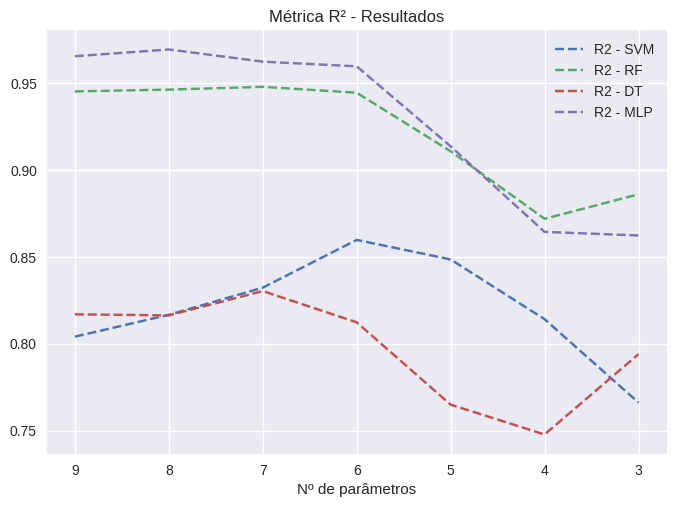

In [5]:
# Defining x axis for plot

x_axis = list(range(9, 2, -1)) # representing number of parameters

# R2 Line Plotting

fig, ax = plt.subplots()

r2_metric_svm = ax.plot(x_axis, r2_svm, label="R2 - SVM", linestyle='--')
r2_metric_rf = ax.plot(x_axis, r2_rf, label="R2 - RF", linestyle='--')
r2_metric_dt = ax.plot(x_axis, r2_dt, label="R2 - DT", linestyle='--')
r2_metric_mlp = ax.plot(x_axis, r2_mlp, label="R2 - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica R² - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.show()

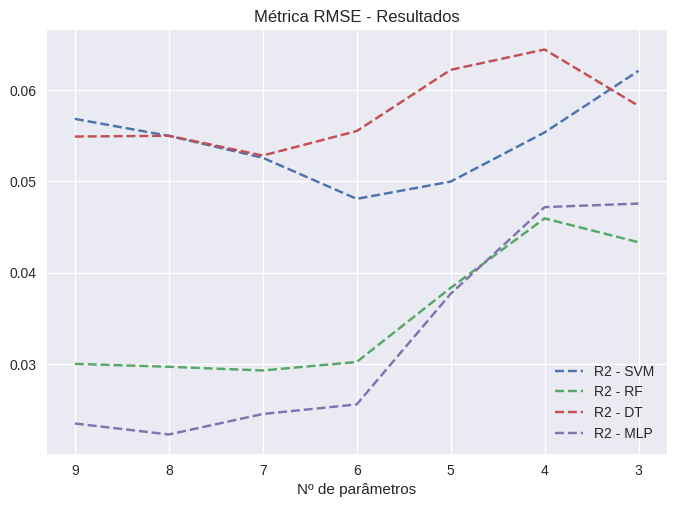

In [6]:
# RMSE Line Plotting

fig, ax = plt.subplots()

rmse_metric_svm = ax.plot(x_axis, rmse_svm, label="R2 - SVM", linestyle='--')
rmse_metric_rf = ax.plot(x_axis, rmse_rf, label="R2 - RF", linestyle='--')
rmse_metric_dt = ax.plot(x_axis, rmse_dt, label="R2 - DT", linestyle='--')
rmse_metric_mlp = ax.plot(x_axis, rmse_mlp, label="R2 - MLP", linestyle='--')

ax.invert_xaxis()

plt.xticks(rotation=0)

ax.set_title("Métrica RMSE - Resultados")

ax.set_xlabel("Nº de parâmetros")

ax.legend()
plt.show()

## IQA esperado x IQA obtido

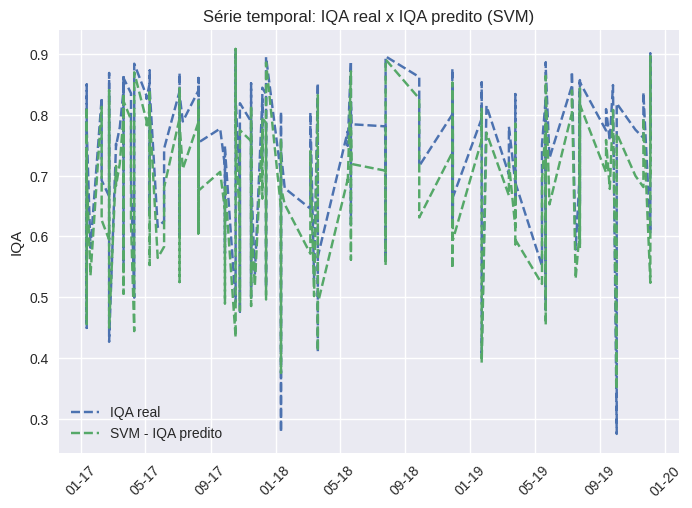

In [7]:
# Plot expected targets X predicted targets

# Line Plot of observed values and predicted values

csv_dataframe['Data Coleta'] = pd.to_datetime(csv_dataframe['Data Coleta'])

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['svm_target'], label='SVM - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (SVM)")
ax.set_ylabel("IQA")
ax.legend()
plt.show()

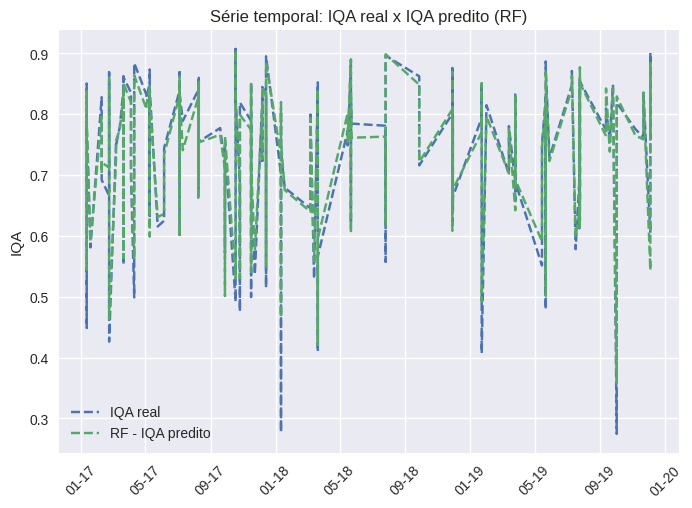

In [8]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['rf_target'], label='RF - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (RF)")
ax.set_ylabel("IQA")
ax.legend()
plt.show()

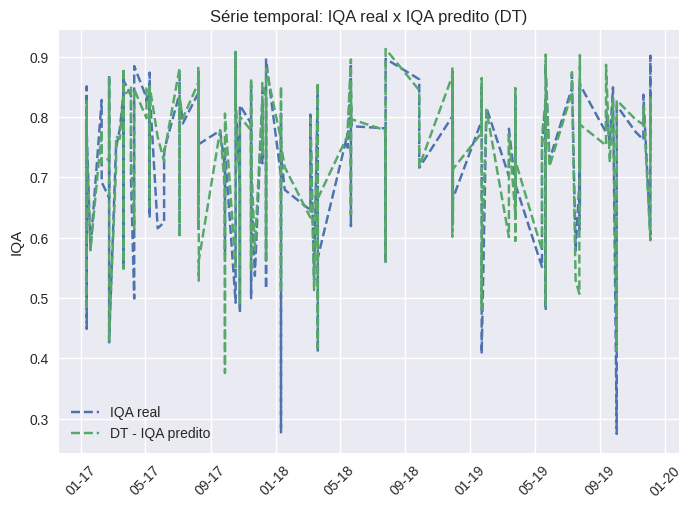

In [9]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['dt_target'], label='DT - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (DT)")
ax.set_ylabel("IQA")
ax.legend()
plt.show()

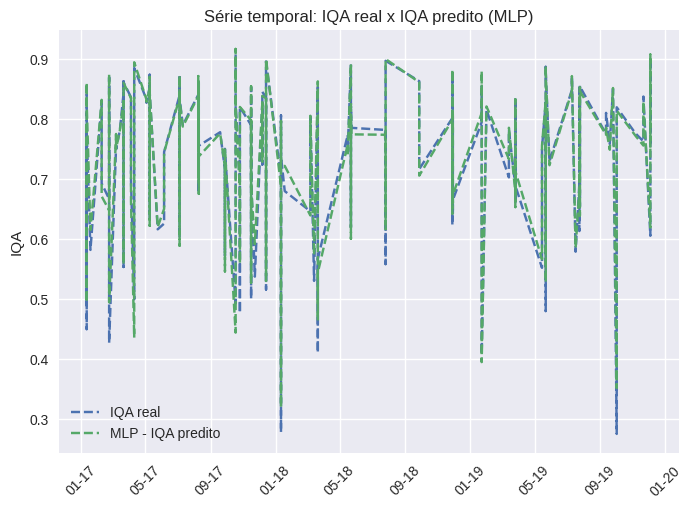

In [10]:
# Line Plot of observed values and predicted values

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['mlp_target'], label='MLP - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (MLP)")
ax.set_ylabel("IQA")
ax.legend()
plt.show()

## IQA esperado x IQA obtido - 3 parâmetros

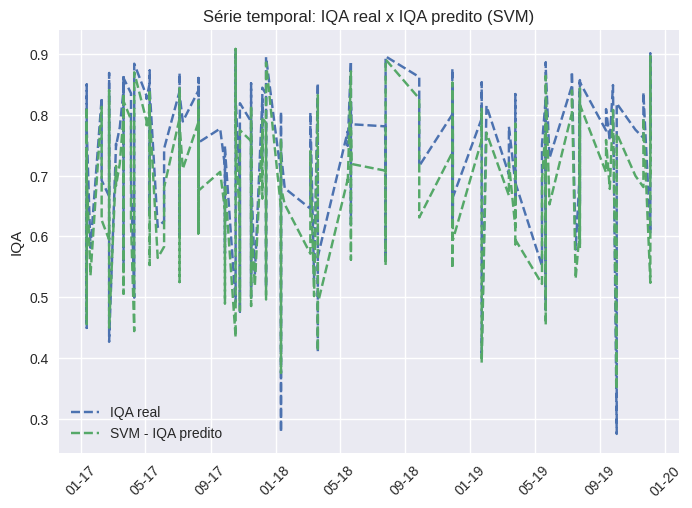

In [11]:
# Plot expected targets X predicted targets for 3 parameters

# Line Plot of observed values and predicted values

csv_dataframe['Data Coleta'] = pd.to_datetime(csv_dataframe['Data Coleta'])

fig, ax = plt.subplots()
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['y_test'], label='IQA real', linestyle='--')
ax.plot(csv_dataframe['Data Coleta'], csv_dataframe['svm_target'], label='SVM - IQA predito', linestyle='--')

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.set_title("Série temporal: IQA real x IQA predito (SVM)")
ax.set_ylabel("IQA")
ax.legend()
plt.show()

## Algorithm metrics dataframe

### RF

In [12]:
svm_metrics_df = pd.json_normalize(metrics_data['SVM'])

svm_metrics_df = svm_metrics_df.style.set_caption('SVM')

svm_metrics_df

,RMSE,MSE,MAE,R2,R
0,0.056833,0.003230,0.051945,0.804086,0.896708
1,0.054976,0.003022,0.047203,0.816676,0.903702
2,0.052578,0.002764,0.044293,0.832323,0.912317
3,0.048081,0.002312,0.039791,0.859780,0.927243
4,0.049970,0.002497,0.039508,0.848544,0.921164
5,0.055354,0.003064,0.047723,0.814148,0.902301
6,0.062093,0.003856,0.054615,0.766138,0.875293


### RF

In [13]:
svm_metrics_df = pd.json_normalize(metrics_data['RF'])

svm_metrics_df = svm_metrics_df.style.set_caption('RF')

svm_metrics_df

,RMSE,MSE,MAE,R2,R
0,0.030022,0.000903,0.020191,0.945256,0.972241
1,0.029705,0.000885,0.020486,0.946296,0.972771
2,0.029300,0.000859,0.020301,0.947900,0.973601
3,0.030231,0.000915,0.021025,0.944488,0.971845
4,0.038344,0.001471,0.028976,0.910798,0.954356
5,0.045943,0.002111,0.034291,0.871941,0.933775
6,0.043334,0.001879,0.033038,0.886050,0.941298


### DT

In [14]:
svm_metrics_df = pd.json_normalize(metrics_data['DT'])

svm_metrics_df = svm_metrics_df.style.set_caption('DT')

svm_metrics_df

,RMSE,MSE,MAE,R2,R
0,0.054900,0.003018,0.036438,0.816962,0.903833
1,0.054987,0.003028,0.036546,0.816357,0.903492
2,0.052822,0.002797,0.035264,0.830340,0.911183
3,0.055498,0.003094,0.036799,0.812356,0.901180
4,0.062202,0.003875,0.045180,0.764967,0.874562
5,0.064429,0.004158,0.046810,0.747803,0.864680
6,0.058257,0.003395,0.043638,0.794057,0.891086


### MLP

In [15]:
svm_metrics_df = pd.json_normalize(metrics_data['MLP'])

svm_metrics_df = svm_metrics_df.style.set_caption('MLP')

svm_metrics_df

,RMSE,MSE,MAE,R2,R
0,0.023496,0.000569,0.016900,0.965508,0.982583
1,0.022296,0.000505,0.015901,0.969393,0.984570
2,0.024536,0.000620,0.018321,0.962380,0.980986
3,0.025588,0.000664,0.018812,0.959695,0.979627
4,0.037691,0.001424,0.030468,0.913638,0.955834
5,0.047178,0.002236,0.037238,0.864403,0.929677
6,0.047565,0.002270,0.037288,0.862340,0.928581
